In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
from imutils.perspective import four_point_transform

In [2]:
img_original = cv2.imread('./images/03.jpg')

cv2.namedWindow('Original', cv2.WINDOW_NORMAL)
cv2.imshow('Original', img_original)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Scanning

### 1. Resize the image and set aspect ratio

In [3]:
def resizer(image, width=500):
    # get width and height of image
    h,w,c = image.shape
    height = int(width * (h/w))
    size = (width, height)
    image = cv2.resize(image, (width, height))
    return image, size

In [4]:
image_re, size = resizer(img_original)

print(size)
cv2.imshow('Resize', image_re)
cv2.waitKey(0)
cv2.destroyAllWindows()

(500, 666)


### 2. Image Processing
 - Enhance
 - Grayscale
 - Blur
 - Edge Detect
 - Morphological transform
 - Countours
 - Find Four Points 

In [5]:
detail = cv2.detailEnhance(image_re, sigma_s=20, sigma_r=0.15)
gray = cv2.cvtColor(detail, cv2.COLOR_BGR2GRAY) # gray scale
blur = cv2.GaussianBlur(gray, (5,5), 0) # gaussian blur

#edge detection
edge_image = cv2.Canny(blur, 75, 200)

#morphological transform
kernel = np.ones((5,5), np.uint8)
dilate = cv2.dilate(edge_image, kernel, iterations=1) #dilated image
closing = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel) #closed image

#find contours
contours, hire = cv2.findContours(closing.copy(), 
                                  cv2.RETR_LIST, 
                                  cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
for contour in contours:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02*peri, True)
    if len(approx) == 4:
        four_points = np.squeeze(approx)
        break


#draw contours
cv2.drawContours(image_re, [four_points], -1, (0,255,0), 3)

#four_points for original image
multiplier = img_original.shape[1]/ size[0]
four_points_original = four_points * multiplier
four_points_original = four_points_original.astype(int)

wrap_image = four_point_transform(img_original, four_points_original)

cv2.imshow('Wrap', wrap_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Document Scanner Function

In [6]:
def document_scanner(image):

    image_re, size = resizer(image)

    detail = cv2.detailEnhance(image_re, sigma_s=20, sigma_r=0.15)
    gray = cv2.cvtColor(detail, cv2.COLOR_BGR2GRAY) # gray scale
    blur = cv2.GaussianBlur(gray, (5,5), 0) # gaussian blur

    #edge detection
    edge_image = cv2.Canny(blur, 75, 200)

    #morphological transform
    kernel = np.ones((5,5), np.uint8)
    dilate = cv2.dilate(edge_image, kernel, iterations=1) #dilated image
    closing = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel) #closed image

    #find contours
    contours, hire = cv2.findContours(closing.copy(), 
                                    cv2.RETR_LIST, 
                                    cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    for contour in contours:
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02*peri, True)
        if len(approx) == 4:
            four_points = np.squeeze(approx)
            break


    #draw contours
    cv2.drawContours(image_re, [four_points], -1, (0,255,0), 3)

    #four_points for original image
    multiplier = image.shape[1]/ size[0]
    four_points_original = four_points * multiplier
    four_points_original = four_points_original.astype(int)

    wrap_image = four_point_transform(image, four_points_original)

    return wrap_image, four_points_original, image_re, closing


In [7]:
img = cv2.imread('./images/03.jpg')
wrap_image, four_points, image_re, closing = document_scanner(img)

cv2.imshow('Original', img)
cv2.imshow('Resize', image_re)
cv2.imshow('Closing', closing)
cv2.imshow('Wrap', wrap_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

MAGIC COLOR

In [8]:
def apply_brightness_contrast(input_img, brightness = 0, contrast= 0):
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow

        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()

    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)

        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf


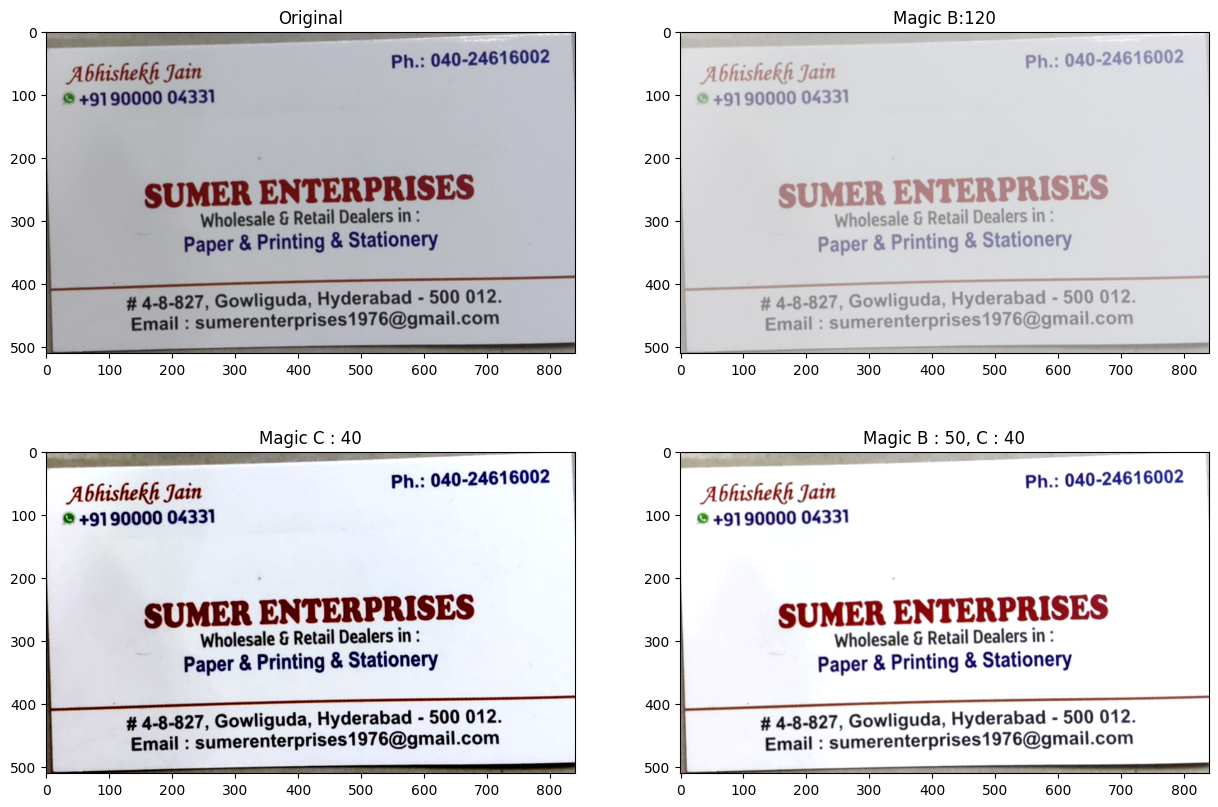

In [9]:
rgb = cv2.cvtColor(wrap_image, cv2.COLOR_BGR2RGB)
magic_image = apply_brightness_contrast(rgb,120,0)
magic_image_c1 = apply_brightness_contrast(rgb,0,40)
magic_image_c2 = apply_brightness_contrast(rgb,50,40)


plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(rgb)
plt.title('Original')

plt.subplot(2,2,2)
plt.imshow(magic_image)
plt.title('Magic B:120')

plt.subplot(2,2,3)
plt.imshow(magic_image_c1)
plt.title('Magic C : 40')

plt.subplot(2,2,4)
plt.imshow(magic_image_c2)
plt.title('Magic B : 50, C : 40')

plt.show()

PREDICTIONS


In [10]:
import predictions as pred

In [11]:
img_bb, results = pred.get_predictions(magic_image_c2)

gi eerie me abhishekh jain ® 9190000 04331 ph. 040-24616002 sumer enterprises wholesale retail dealers in paper printing stationery 4-8-827, gowliguda, hyderabad - 500 012. email sumerenterprises1976@gmail.com


In [12]:
cv2.namedWindow('Original', cv2.WINDOW_NORMAL)
cv2.imshow('Original', img_bb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
results

{'NAME': [],
 'ORG': ['Enterprises Wholesale Retail Dealers'],
 'DES': [],
 'PHONE': ['919000004331', '040'],
 'EMAIL': ['sumerenterprises1976@gmail.com'],
 'WEB': []}